ЗАДАЧА КЛАССИФИКАЦИИ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('titanik/train.csv', index_col='PassengerId')
test_df = pd.read_csv('titanik/test.csv', index_col='PassengerId')
# combine = [train_df, test_df]

In [3]:
#Атрибуты таблицы
print(train_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
#Пример данных
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset = train_df[['Survived', 'Pclass', 'Sex', 'Age']]
dataset = dataset.dropna()
dataset.head()

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0


In [6]:
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
dataset['Bias'] = 1
dataset.head()

,Survived,Pclass,Sex,Age,Bias
PassengerId,,,,,
1,0,3,0,22.0,1
2,1,1,1,38.0,1
3,1,3,1,26.0,1
4,1,1,1,35.0,1
5,0,3,0,35.0,1


In [7]:
x = dataset[['Pclass','Sex','Age','Bias']].values
y = dataset['Survived'].values
x[:5], y[:5]

(array([[ 3.,  0., 22.,  1.],
        [ 1.,  1., 38.,  1.],
        [ 3.,  1., 26.,  1.],
        [ 1.,  1., 35.,  1.],
        [ 3.,  0., 35.,  1.]]),
 array([0, 1, 1, 1, 0]))

Гипотеза линейной регрессии: $z_\theta(x) = \theta_0x_0 + \theta_1x_1 \dots + \theta_nx_n = \theta^T(1||x)$

In [8]:
def z(theta, x):
    return x @ theta.T

In [9]:
init_theta =  np.array([0.1,0.1, 0.1, 0.1])
z(init_theta, x)[:5]

array([2.6, 4.1, 3.1, 3.8, 3.9])

Cигмоид-функция:
$$y(x) = \frac{1}{1 + e^{-z}}$$

In [10]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

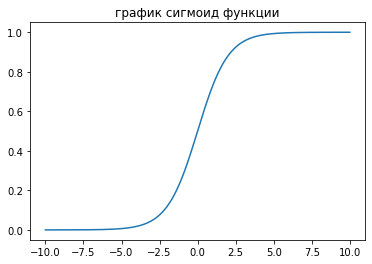

In [11]:
x_axis = np.linspace(-10,10, 10**4)
y_axis = sigmoid(x_axis)
plt.plot(x_axis, y_axis)
plt.title("график сигмоид функции")
plt.show()

Логистическая регрессия использует комбинацию сигмоид-функции и линейной регрессис:
$$h_\theta(x) = \frac{1}{1 + e^{-z_\theta(x)}} = \frac{1}{1 + e^{-\theta^Tx}}$$

In [12]:
def hypothesis(theta, x):
    return sigmoid(z(theta, x))

In [13]:
hypothesis(init_theta, x)[:5]

array([0.93086158, 0.9836975 , 0.95689275, 0.97811873, 0.98015969])

Логистическая регрессия дает нам верояность $н$ равной $1$ для данного $\theta$.
$$h_\theta(x) = P(y = 1 \,|\, x ; \theta) = 1 - P(y = 0 \,|\, x ; \theta)$$

ЗАДАЧА: найти такое значение $\theta$, чтобы гипотеза давала нам наиболее точное предсказание для набора данных $(x_i, y_i)$ 
$$ \theta* = \text{argmin}_{\theta}\sum{-y_i\text{log}h_\theta(x_i)-(1-y_i)\text{log}(1-h_\theta(x_i))} $$

In [14]:
def loss_function(theta, x, y):
    h = hypothesis(theta, x)
    loss = -y * np.log(h) - (1 - y) * np.log(1 - h)
    loss_mean = np.mean(loss)
    return loss_mean

In [15]:
loss_function(init_theta, x, y)

2.110018347214136

In [33]:
def gradient_descent(init_theta, x, y, learning_rate, iterations, save_frequency):
    loss_history = []
    theta = init_theta
    for i in range(iterations):
        if i%save_frequency==0:
            loss_history.append(loss_function(theta, x, y))
        gradient = 1/len(x) * (hypothesis(theta, x) - y) @ x
        theta = theta - learning_rate * gradient
    return (loss_history, theta)

In [57]:
loss_history, theta = gradient_descent(init_theta, x, y, 
                                       learning_rate=0.001, iterations=10**5, save_frequency=10**2)

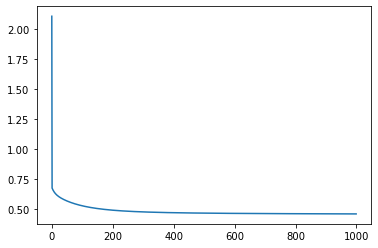

In [58]:
plt.plot(loss_history)
plt.show()

In [59]:
print(dataset.columns[1:])
print(theta)

Index(['Pclass', 'Sex', 'Age', 'Bias'], dtype='object')
[-0.97183587  2.49598772 -0.02147739  1.35436963]


In [60]:
hypothesis(x,theta)[:5]

array([0.11571587, 0.88719264, 0.59301359, 0.89348205, 0.09006457])

In [61]:
y_predict = np.rint(hypothesis(x,theta))
(y==y_predict).mean()

0.7913165266106442

In [66]:
passenger = {'Pclass': 3, 'Sex':0, 'Age': 25, 'Bias':1}
x_test = np.array([passenger[k] for k in passenger])
hypothesis(x_test, theta)

0.10928427399736478

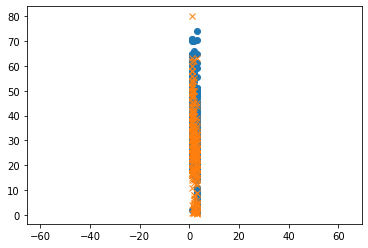

In [68]:
# min_values = np.min(x, axis=0)
# max_values = np.max(x, axis=0)

# line = lambda x: x * -parameters[0]/parameters[1] + bias
# dissect_line = np.linspace(start=min_values[0], stop=max_values[0],num=10**4)

plt.plot(x[y==0][:,0], x[y==0][:,2], 'o')
plt.plot(x[y==1][:,0], x[y==1][:,2], 'x')
plt.axis('equal')

# plt.plot(dissect_line, line(dissect_line))
plt.show()